In [145]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression
from sklearn.covariance import empirical_covariance
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV

def MSE(model, X_test, y_test):
    test_err = np.mean((model.predict(X_test) - y_test) ** 2)
    print(f"Test mean squared error of the model is", test_err, ".")

# Linear Regression: Regularization, Feature Selection etc.

In [13]:
diabetes = load_diabetes()
X = diabetes['data']
y = diabetes['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## No regularization, no feature selection

In [59]:
model_0 = LinearRegression()
model_0.fit(X_train, y_train)
test_err_0 = np.mean((model_0.predict(X_test) - y_test) ** 2)
print(f"Test mean squared error of the unregularized model without feature selection is", test_err_0, ".")

Test mean squared error of the unregularized model without feature selection is 3032.2744510045104 .


## By-hand subset selection

Let's look at the correlation score and filter out those features which show a strong correlation with the corresponding labels. To that end, we make use of the `r_regression` function from sklearn.

In [72]:
mask = abs(r_regression(X_train, y_train)) > 0.3
model_1 = LinearRegression()
model_1.fit(X_train[:, mask], y_train)
test_err_1 = np.mean((model_1.predict(X_test[:, mask]) - y_test) ** 2)
print(f"Test mean squared error of the unregularized model with feature selection is", test_err_1, ".")

Test mean squared error of the unregularized model with feature selection is 3263.9168833028207 .


The test error increases when we reduce the number of features, but only slightly. In this way, we see that the chosen features are the predictive ones. This increases the interpretability of the model and reduces computational costs.\
\
Let's see what happens if we take exactly those features with low correlation coefficients.

In [74]:
model_1_bad = LinearRegression()
model_1_bad.fit(X_train[:, ~mask], y_train)
test_err_1_bad = np.mean((model_1_bad.predict(X_test[:, ~mask]) - y_test) ** 2)
print(f"Test mean squared error of the unregularized model with the bad feature selection is", test_err_1_bad, ".")

Test mean squared error of the unregularized model with the bad feature selection is 5967.128468210624 .


With this, it is clear that dropping the "bad" features didn't increase the MSE substantially while dropping the predictive features did.

## Feature selection with `SelectKBest`

In [75]:
from sklearn.feature_selection import SelectKBest, f_regression

In [104]:
subset_fit = SelectKBest(f_regression, k=5).fit(X_train, y_train)
X_train_new = subset_fit.transform(X_train)
X_test_new = subset_fit.transform(X_test)

In [105]:
model_2 = LinearRegression()
model_2.fit(X_train_new, y_train)
test_err_2 = np.mean((model_2.predict(X_test_new) - y_test) **2 )
print(f"Test mean squared error of the unregularized model with the SelectKBest feature selection is", test_err_2, ".")

Test mean squared error of the unregularized model with the SelectKBest feature selection is 3270.8925752670843 .


## Ridge regression with fixed coefficient

In [130]:
model_3 = Ridge(alpha = 0.4)
model_3.fit(X_train, y_train)
MSE(model_3, X_test, y_test)

Test mean squared error of the model is 3356.232112945951 .


## Finding the optimal ridge regression coefficient

In [113]:
from sklearn.model_selection import GridSearchCV

In [141]:
params = {'alpha': [0.1*i for i in range(10)]}
model_4 = Ridge()
optimal_ridge = GridSearchCV(model_4, params, cv=5)
optimal_ridge.fit(X_train, y_train)
MSE(optimal_ridge, X_test, y_test)
print(f"The GridSearchCV for the optimal choice of alpha yields alpha = ", params['alpha'][np.argmin(optimal_ridge.cv_results_['rank_test_score'])])

Test mean squared error of the model is 3129.2937130079144 .
The GridSearchCV for the optimal choice of alpha yields alpha =  0.1


## Lasso regression

In [144]:
model_5 = Lasso(alpha=0.3)
model_5.fit(X_train, y_train)
MSE(model_5, X_test, y_test)
model_5.get_params()

Test mean squared error of the model is 3367.9271875330373 .


{'alpha': 0.3,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

## Elastic net with CV search

In [156]:
model_6 = ElasticNetCV(l1_ratio=0.9, cv=5)
model_6.fit(X_train, y_train)
MSE(model_6, X_test, y_test)

Test mean squared error of the model is 3117.541373766404 .


(100, 10)

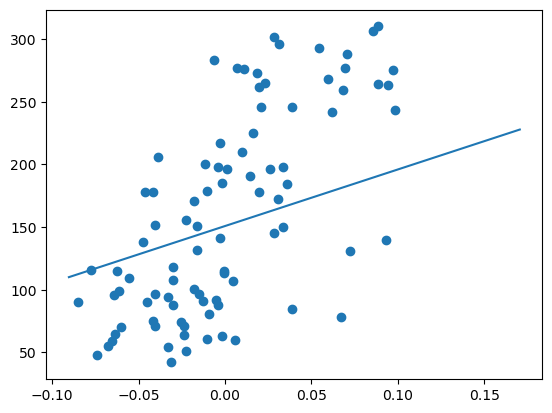

In [190]:
X_min = np.zeros((10))
X_min[2] = np.min(X[:,2])
X_max = np.zeros((10))
X_max[2] = np.max(X[:,2])
X_2_cont = np.linspace(X_min, X_max, 100)
pred_cont = model_6.predict(X_2_cont)
plt.scatter(X_test[:,2], y_test)
plt.plot(X_2_cont[:,2], pred_cont)
X_2_cont.shape